In [1]:
from skimage import exposure, io
from skimage import color
from matplotlib import pyplot
import numpy as np


In [2]:
images = io.imread_collection("image/*.jpg")

In [5]:
def get_histogram(image):
    bins_count = 256
    gray, _ = exposure.histogram(color.rgb2gray(image), normalize=True, nbins=bins_count, source_range="dtype")
    red, _ = exposure.histogram(image[:,:,0], normalize=True, nbins=bins_count, source_range="dtype")
    green, _ = exposure.histogram(image[:,:,1], normalize=True, nbins=bins_count, source_range="dtype")
    blue, _ = exposure.histogram(image[:,:,2], normalize=True, nbins=bins_count, source_range="dtype")

    return [gray, red, green, blue]

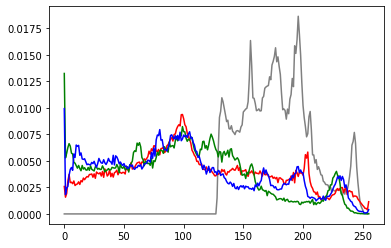

In [6]:
histograms = get_histogram(images[100])

pyplot.plot(histograms[0], color="gray")
pyplot.plot(histograms[1], color="red")
pyplot.plot(histograms[2], color="green")
pyplot.plot(histograms[3], color="blue")


In [7]:
def histogram_intersection(ref_hist: np.ndarray, other_hist: np.ndarray) -> np.float64:
    return np.sum(np.minimum(ref_hist, other_hist))

In [8]:
import enum

class methods(enum.IntEnum):
    gray = 0
    red = 1
    green = 2
    blue = 3 


In [9]:
def get_similar_images_using_histogram(image, images):
    this_histogram = get_histogram(image)

    def get_similarity(other_histogram):
        gray_similarity = histogram_intersection(this_histogram[methods.gray], other_histogram[methods.gray])
        red_similarity = histogram_intersection(this_histogram[methods.red], other_histogram[methods.red])
        green_similarity = histogram_intersection(this_histogram[methods.green], other_histogram[methods.green])
        blue_similarity = histogram_intersection(this_histogram[methods.blue], other_histogram[methods.blue])

        return gray_similarity * 3 + red_similarity + green_similarity + blue_similarity

    intersection_map = []

    for i in range(len(images)):
        other_image = images[i]
        other_histograms = get_histogram(other_image)
        intersection_map.append((i, get_similarity(other_histograms)))

    sorted_intersection_map = sorted(intersection_map, key=lambda x: x[1], reverse=True)
    images = [i for i, _ in sorted_intersection_map]

    return (images[:10], images[-10:])


[712, 701, 767, 30, 706, 0, 883, 236, 705, 772]
[463, 420, 493, 474, 413, 434, 439, 431, 423, 469]


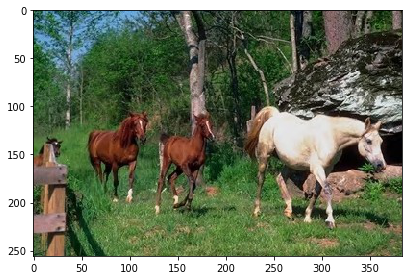

In [10]:
similar_images_indices, dissimilar_images_indices = get_similar_images_using_histogram(images[712], images)
print(similar_images_indices)
print(dissimilar_images_indices)
io.imshow(images[712])

/home/ujjwal/.local/share/virtualenvs/Code-Kjb3QomJ/lib/python3.9/site-packages/ipyplot/_utils.py:97: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.asarray(seq)



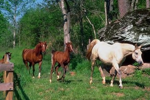
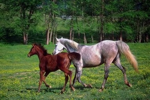
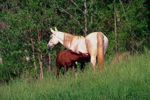
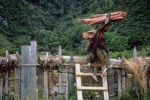
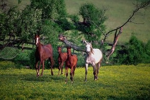
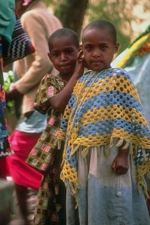
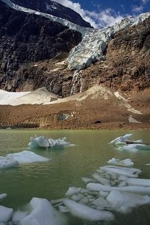
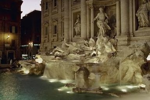
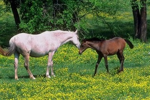
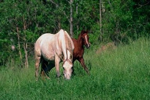


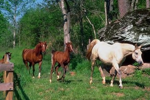
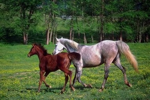
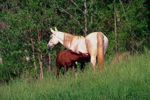
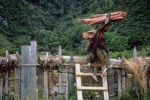
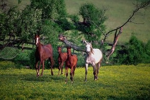
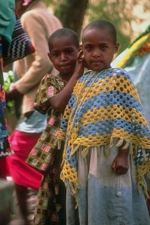
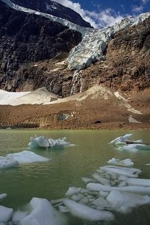
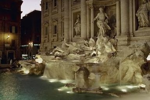
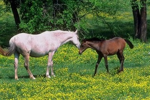
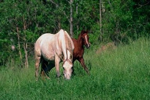

In [11]:
import ipyplot
similar_images = [images[i] for i in similar_images_indices]
ipyplot.plot_images(similar_images)


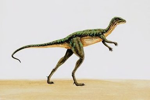
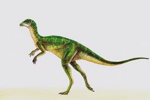
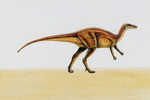
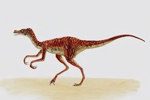
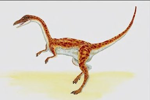
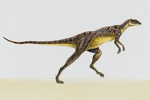
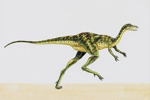
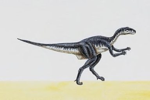
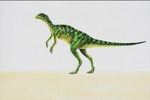
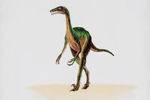


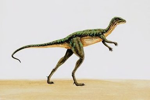
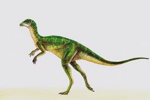
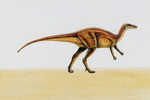
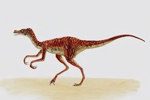
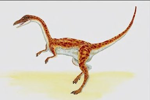
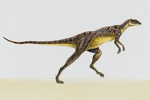
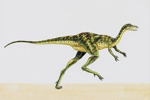
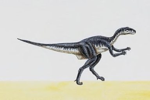
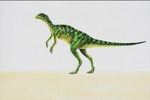
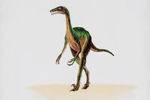

In [12]:
dissimilar_images = [images[i] for i in dissimilar_images_indices]
ipyplot.plot_images(dissimilar_images)